(sec:vif)=
## Variance Inflation Factor (VIF)

* **Definition**: VIF measures how much the variance of a regression coefficient is inflated due to **multicollinearity** (correlation among predictors).
* If predictors are highly correlated, the coefficient estimates become unstable (large standard errors).

---

### 🔹 Formula

For a predictor $X_j$:

$$
VIF_j = \frac{1}{1 - R_j^2}
$$

where

* $R_j^2$ is the coefficient of determination when $X_j$ is regressed on **all other predictors**.

---

### 🔹 Interpretation of VIF

* **VIF = 1** → No correlation with other variables.
* **1 ≤ VIF < 5** → Moderate correlation, usually acceptable.
* **VIF ≥ 5 (or 10, depending on rule of thumb)** → High multicollinearity, problematic.

---

### 🔹 Why it Matters

* Multicollinearity doesn’t affect model prediction much, but it makes **interpretation of coefficients unreliable**.
* Standard errors inflate → wider confidence intervals → coefficients may appear insignificant.

---

### 🔹 Example

Suppose in a housing price regression:

* Predictors: `sqft`, `bedrooms`, `bathrooms`.
* `sqft` and `bedrooms` are highly correlated (bigger houses tend to have more bedrooms).
* VIF for `bedrooms` might be very high → its coefficient estimate becomes unstable.

---

👉 So, VIF is a **diagnostic tool** to check if your regression model suffers from multicollinearity.



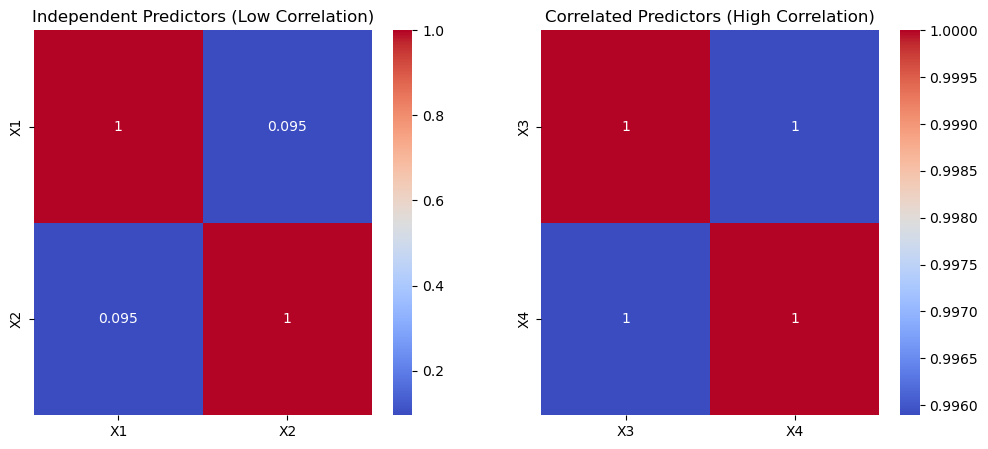

(  Feature       VIF
 0      X1  1.009136
 1      X2  1.009136,
   Feature         VIF
 0      X3  121.983031
 1      X4  121.983031)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Create synthetic dataset
np.random.seed(42)
n = 200

# Independent predictors (low correlation case)
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
Y = 3*X1 + 2*X2 + np.random.normal(0, 1, n)

# Correlated predictors (high correlation case)
X3 = np.random.normal(0, 1, n)
X4 = X3 + np.random.normal(0, 0.1, n)  # highly correlated with X3
Y_corr = 3*X3 + 2*X4 + np.random.normal(0, 1, n)

# Put into DataFrames
df_independent = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
df_correlated = pd.DataFrame({'X3': X3, 'X4': X4, 'Y_corr': Y_corr})

# Function to compute VIF
def compute_vif(df, features):
    X = sm.add_constant(df[features])
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(X.values, i+1) for i in range(len(features))]
    return vif_data

# Compute VIF for both cases
vif_independent = compute_vif(df_independent, ['X1', 'X2'])
vif_correlated = compute_vif(df_correlated, ['X3', 'X4'])

# Plot heatmaps of correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(df_independent[['X1','X2']].corr(), annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Independent Predictors (Low Correlation)")

sns.heatmap(df_correlated[['X3','X4']].corr(), annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlated Predictors (High Correlation)")

plt.show()

vif_independent, vif_correlated
